In [1]:
#Importing Libraries
# Data Handling Libraries
import pandas as pd
import numpy as np
from collections import OrderedDict

# Import Data Visulalization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics Libraries
import scipy.stats as sci

# Ignore Warnings 
import warnings 
warnings.filterwarnings('ignore')

# Importing Machine Learning Libraries
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Importing Validation Metrics
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error


In [2]:
df = pd.read_excel('Data.xlsx')
df2 = df.copy() # Creating another set copy of df

In [3]:
df2.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
df2.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7,52.61


In [5]:
df2.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


# Preparing Custom EDA Report

In [6]:
def custom_summary(data):
    result = []
    for col in data.columns:
        stats= OrderedDict({"Column Name":col,
                            "Count":data[col].count(),
                            "Data Type":data[col].dtype,
                            "Minimum":data[col].min(),
                            "Quartile 1":data[col].quantile(0.25),
                            "Mean":data[col].mean(),
                            "Median":data[col].median(),
                            "Quartile 3":data[col].quantile(0.75),
                            "Maximum":data[col].max(),
                            "Variance":data[col].var(),
                            "Standard Devaiation":data[col].std(),
                            "IQR":(data[col].quantile(0.75)-data[col].quantile(0.25)),
                            "Skewness":data[col].skew(),
                            "Kurtosis":data[col].kurt()
                           })
        result.append(stats)
        
        # Skewness Comment
        
        if data[col].skew()<-1:
            sk_label= "Highly Negatively Skewed"
        elif -1< data[col].skew()<-0.5:
            sk_label= "Moderately Negatively Skewed"
        elif -0.5< data[col].skew()<0:
            sk_label="Fairly Symmetric(Negative)"
        elif 0<data[col].skew()<0.5:
            sk_label="Fairly Symmetric(Positive)"
        elif 0.5<data[col].skew()<1:
            sk_label="Moderately Positive Skewed"
        elif data[col].skew()>1:
            sk_label="Highly Positivly Skewed"
        else:
            sk_label='error'
        stats['Skewness Comment']=sk_label
        
        # Outlier Comment
        
        upperlim = stats['Quartile 3'] + (1.5*stats['IQR'])
        lowerlim = stats['Quartile 1'] - (1.5*stats['IQR'])
        if len([x for x in data[col] if x < lowerlim or x > upperlim]) > 0:
            outliercomments = 'Has Outlier'
        else:
            outliercomments = 'Has No Outlier'
        stats['Outlier Comment'] = outliercomments
    result_df=pd.DataFrame(result)
    return result_df

In [7]:
custom_summary(df2)

,Column Name,Count,Data Type,Minimum,Quartile 1,Mean,Median,Quartile 3,Maximum,Variance,Standard Devaiation,IQR,Skewness,Kurtosis,Skewness Comment,Outlier Comment
0,cement,1030,float64,102.00,192.375,281.167864,272.900,350.000,540.0,10921.580220,104.506364,157.625,0.509481,-0.520652,Moderately Positive Skewed,Has No Outlier
1,slag,1030,float64,0.00,0.000,73.895825,22.000,142.950,359.4,7444.124812,86.279342,142.950,0.800717,-0.508175,Moderately Positive Skewed,Has Outlier
2,ash,1030,float64,0.00,0.000,54.188350,0.000,118.300,200.1,4095.616541,63.997004,118.300,0.537354,-1.328746,Moderately Positive Skewed,Has No Outlier
3,water,1030,float64,121.80,164.900,181.567282,185.000,192.000,247.0,456.002651,21.354219,27.100,0.074628,0.122082,Fairly Symmetric(Positive),Has Outlier
4,superplastic,1030,float64,0.00,0.000,6.204660,6.400,10.200,32.2,35.686781,5.973841,10.200,0.907203,1.411269,Moderately Positive Skewed,Has Outlier
5,coarseagg,1030,float64,801.00,932.000,972.918932,968.000,1029.400,1145.0,6045.677357,77.753954,97.400,-0.040220,-0.599016,Fairly Symmetric(Negative),Has No Outlier
6,fineagg,1030,float64,594.00,730.950,773.580485,779.500,824.000,992.6,6428.187792,80.175980,93.050,-0.253010,-0.102177,Fairly Symmetric(Negative),Has Outlier
7,age,1030,int64,1.00,7.000,45.662136,28.000,56.000,365.0,3990.437729,63.169912,49.000,3.269177,12.168989,Highly Positivly Skewed,Has Outlier
8,strength,1030,float64,2.33,23.710,35.817961,34.445,46.135,82.6,279.081814,16.705742,22.425,0.416977,-0.313725,Fairly Symmetric(Positive),Has Outlier


## Outlier Detection Plot (ODT Plots)

## Outlier Replacement Function

In [8]:
def replaceoutlier(data, col, method = "Quartile", strategy = "Median"):
    col_data = data[col]
    if method == "Quartile": # to be followed when Quartile is choosen
        Q2 = data[col].median()
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3-Q1
        upperlim = Q3 + (1.5*IQR)
        lowerlim = Q1 - (1.5*IQR)
        
        # Using Standard Deviation to set values
    elif method == "Standard Deviation":
        col_mean = data[col].mean()
        col_sd = data[col].std()
        cutoff = col_sd*2
        upperlim = col_mean + cutoff
        lowerlim = col_mean - cutoff
    
    else:
        print("Error : Pass a Correct method")
    
    # Printing Outliers
    
    Outliers = data.loc[(col_data<lowerlim) | (col_data > upperlim),col]
    Outier_density = round((len(Outliers)/len(data))*100,2) 
    if len(Outliers)==0:
        print(f'Feature \'{col}\' Does not have any outlier')
    else:
        print(f'Total Numbers of Outliers are:{len(Outliers)}\n')
        print(f' Outlier Percentage: {Outier_density}%\n')
        print(f' Outlier for \'{col}\'are : {np.sort(np.array(Outliers))}\n')
        display(data[(col_data<lowerlim)|(col_data > upperlim)])
                
   # Replacing Outliers
    if strategy == 'Median':
        data.loc[(col_data<lowerlim)|(col_data > upperlim),col] = Q2
    elif strategy == 'Mean':
        data.loc[(col_data<lowerlim)|(col_data > upperlim),col] = col_mean
    else:
        print("Error: Pass a Correcy Stretegy")
    return data

In [9]:
def outlierplots(data, col):
    f, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,8)) 
    kwargs = {'fontsize':20, 'color': 'black'}
    
    ## Descriptive Statistics: Box Plot
    sns.boxplot(data[col],ax=ax1,orient='v', color='red')
    ax1.set_title(col+' Boxplot', **kwargs)
    ax1.set_xlabel('Box density', **kwargs)
    ax1.set_ylabel(col+' Values', **kwargs) 

    #Plotting Histogram with Outlier
    sns.distplot(data[col],ax=ax2, color='brown', fit=sci.norm)
    ax2.axvline(data[col].mean(),color='Green', linestyle='dashed')
    ax2.axvline(data[col].median(),color='Black', linestyle='dashed')
    ax2.set_title(col+' Distribution with Outlier',**kwargs)
    ax2.set_xlabel('Density', **kwargs)
    ax2.set_ylabel(col +' Values', **kwargs)

      #Plotting Histogram without Outlier
    y = replaceoutlier(data,col)
    sns.distplot(y[col],ax=ax3, color='brown', fit=sci.norm)
    ax3.axvline(y[col].mean(),color='Green', linestyle='dashed')
    ax3.axvline(y[col].median(),color='Black', linestyle='dashed')
    ax3.set_title(col+' Distribution without Outlier',**kwargs)
    ax3.set_xlabel('Density', **kwargs)
    ax3.set_ylabel(col +' Values', **kwargs)
    
    plt.show()
    

Feature 'cement' Does not have any outlier


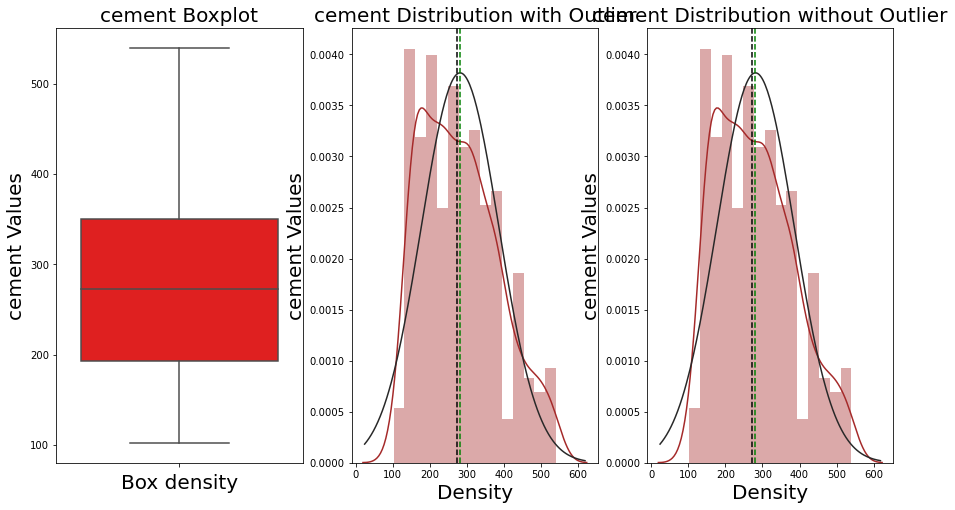

Total Numbers of Outliers are:2

 Outlier Percentage: 0.19%

 Outlier for 'slag'are : [359.4 359.4]



,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
918,239.6,359.4,0.0,185.7,0.0,941.6,664.3,28,39.44
990,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7,25.42


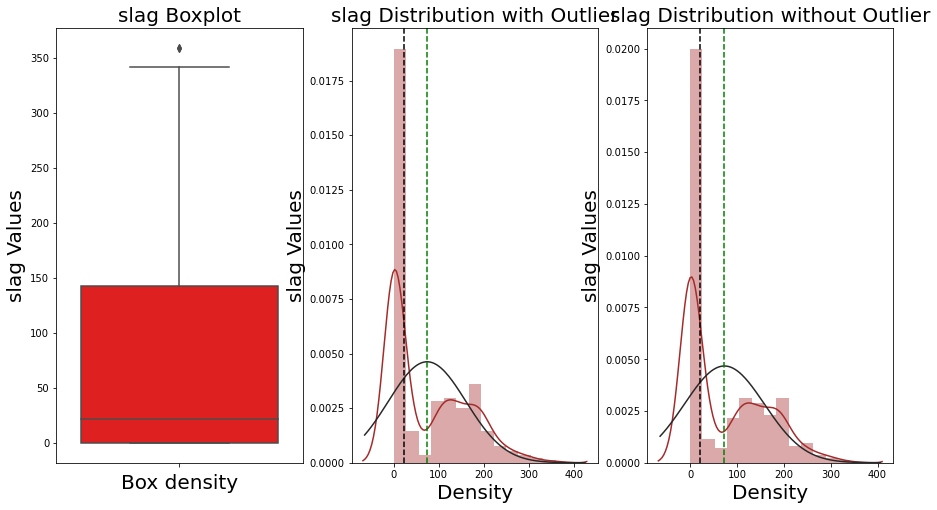

Feature 'ash' Does not have any outlier


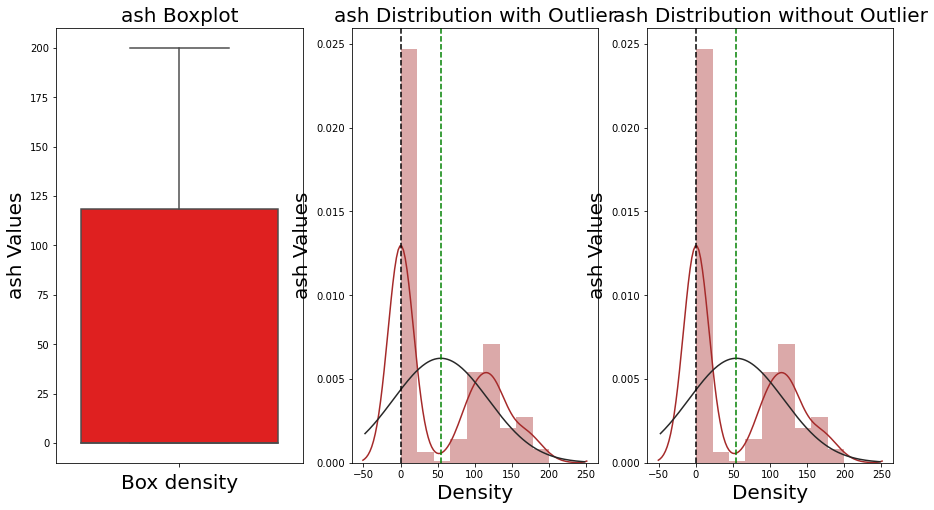

Total Numbers of Outliers are:9

 Outlier Percentage: 0.87%

 Outlier for 'water'are : [121.8 121.8 121.8 121.8 121.8 236.7 237.  246.9 247. ]



,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
66,237.0,92.0,71.0,247.0,6.0,853.0,695.0,28,28.63
263,236.9,91.7,71.5,246.9,6.0,852.9,695.4,28,28.63
432,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,28,24.24
462,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,100,39.23
587,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,3,7.75
740,140.0,164.0,128.0,237.0,6.0,869.0,656.0,28,35.23
789,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,56,32.85
826,139.7,163.9,127.7,236.7,5.8,868.6,655.6,28,35.23
914,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,14,17.82


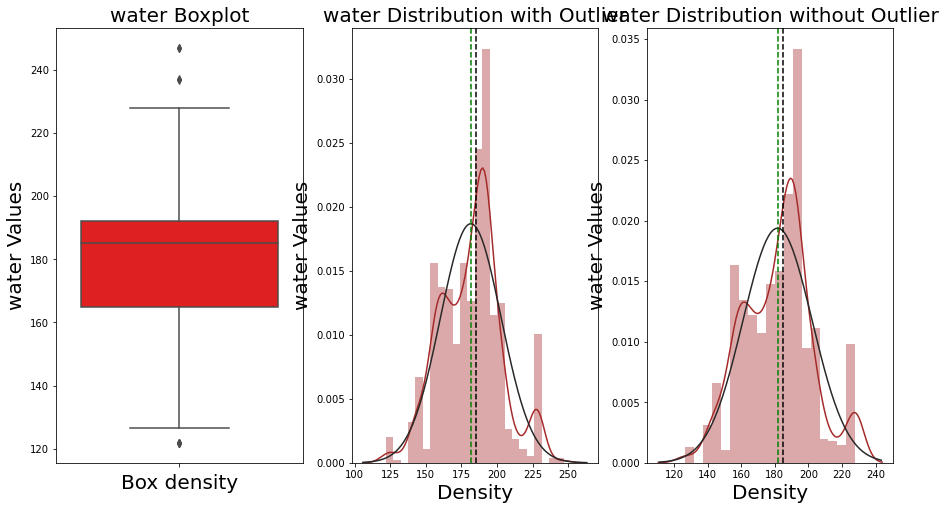

Total Numbers of Outliers are:10

 Outlier Percentage: 0.97%

 Outlier for 'superplastic'are : [28.2 28.2 28.2 28.2 28.2 32.2 32.2 32.2 32.2 32.2]



,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
44,531.3,0.0,0.0,141.8,28.2,852.1,893.7,91,59.2
156,531.3,0.0,0.0,141.8,28.2,852.1,893.7,28,56.4
232,469.0,117.2,0.0,137.8,32.2,852.1,840.5,56,69.3
292,469.0,117.2,0.0,137.8,32.2,852.1,840.5,91,70.7
538,531.3,0.0,0.0,141.8,28.2,852.1,893.7,7,46.9
744,469.0,117.2,0.0,137.8,32.2,852.1,840.5,7,54.9
816,469.0,117.2,0.0,137.8,32.2,852.1,840.5,28,66.9
838,531.3,0.0,0.0,141.8,28.2,852.1,893.7,56,58.8
955,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3,40.2
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.3


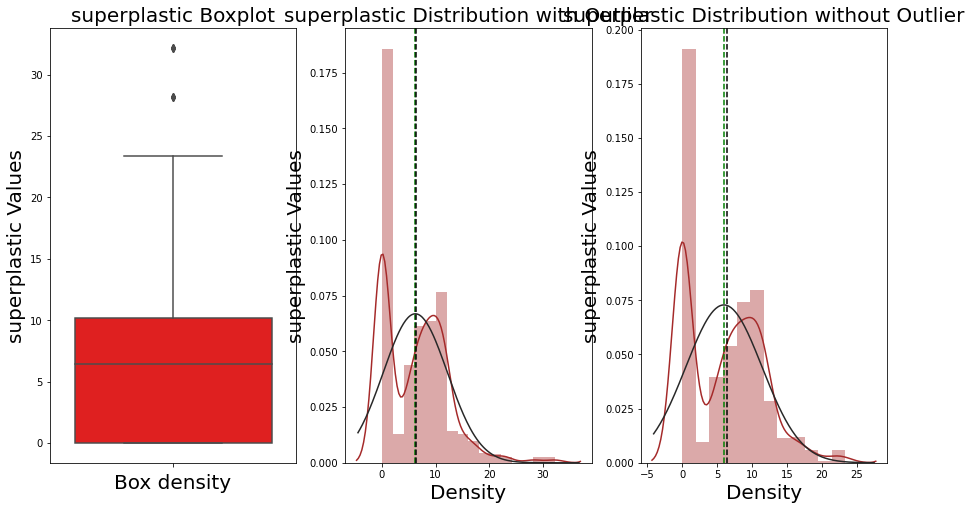

Feature 'coarseagg' Does not have any outlier


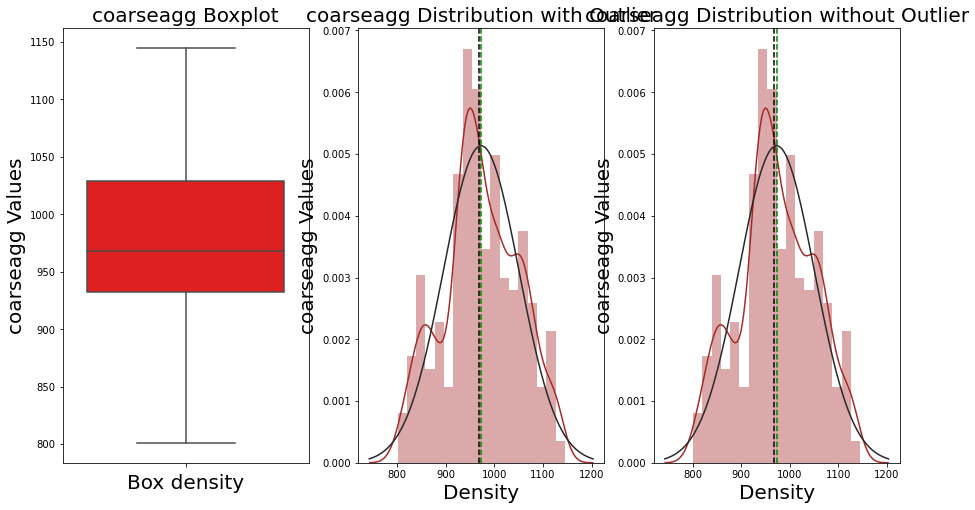

Total Numbers of Outliers are:5

 Outlier Percentage: 0.49%

 Outlier for 'fineagg'are : [992.6 992.6 992.6 992.6 992.6]



,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
129,375.0,93.8,0.0,126.6,23.4,852.1,992.6,91,62.5
447,375.0,93.8,0.0,126.6,23.4,852.1,992.6,7,45.7
504,375.0,93.8,0.0,126.6,23.4,852.1,992.6,3,29.0
584,375.0,93.8,0.0,126.6,23.4,852.1,992.6,56,60.2
857,375.0,93.8,0.0,126.6,23.4,852.1,992.6,28,56.7


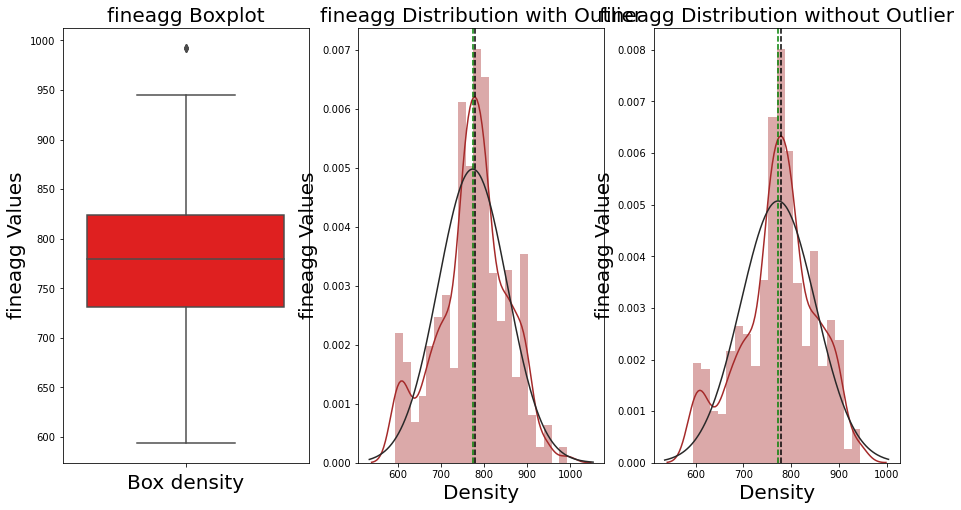

Total Numbers of Outliers are:59

 Outlier Percentage: 5.73%

 Outlier for 'age'are : [180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180
 180 180 180 180 180 180 180 180 270 270 270 270 270 270 270 270 270 270
 270 270 270 360 360 360 360 360 360 365 365 365 365 365 365 365 365 365
 365 365 365 365 365]



,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
51,331.0,0.0,0.0,192.0,0.0,978.0,825.0,180,39.00
64,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
93,427.5,47.5,0.0,228.0,0.0,932.0,594.0,180,41.84
99,237.5,237.5,0.0,228.0,0.0,932.0,594.0,180,36.25
103,380.0,0.0,0.0,228.0,0.0,932.0,670.0,180,53.10
133,236.0,0.0,0.0,193.0,0.0,968.0,885.0,365,25.08
144,302.0,0.0,0.0,203.0,0.0,974.0,817.0,180,26.74
149,380.0,95.0,0.0,228.0,0.0,932.0,594.0,270,41.15
152,322.0,0.0,0.0,203.0,0.0,974.0,800.0,180,29.59
157,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


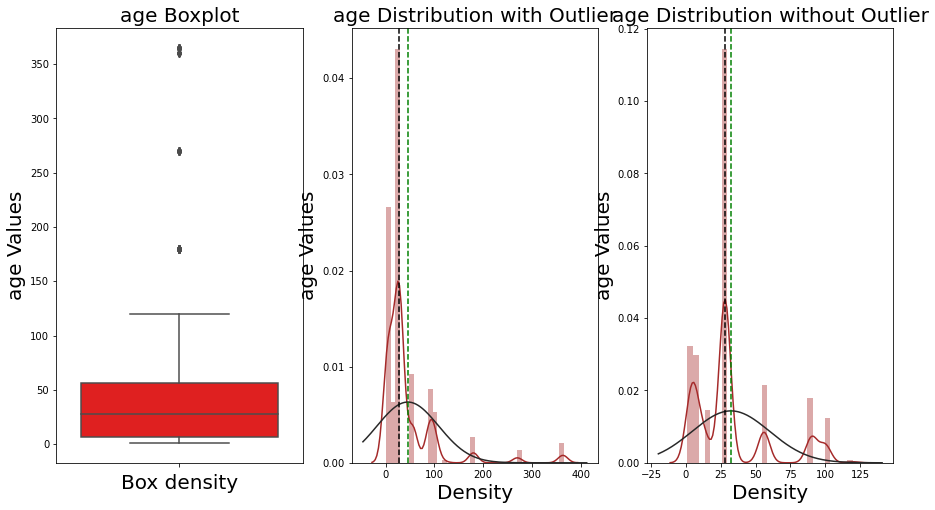

Total Numbers of Outliers are:4

 Outlier Percentage: 0.39%

 Outlier for 'strength'are : [79.99 80.2  81.75 82.6 ]



,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
192,315.0,137.0,0.0,145.0,5.9,1130.0,745.0,28.0,81.75
732,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99
950,389.9,189.0,0.0,145.9,22.0,944.7,755.8,91.0,82.60
1003,323.7,282.8,0.0,183.8,10.3,942.7,659.9,56.0,80.20


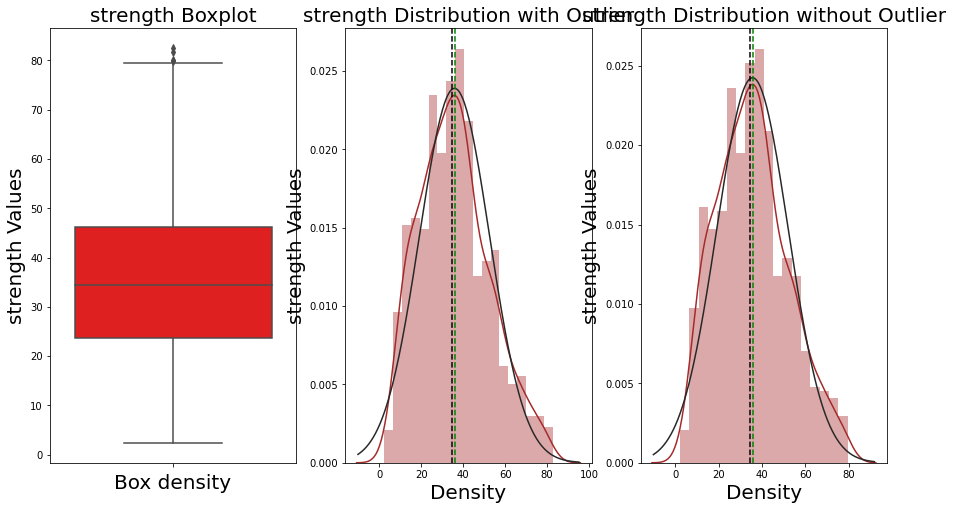

In [10]:
for col in df.columns:
    outlierplots(df,col)

# Function for Missing Values

In [11]:
df.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [12]:
def findandreplacenulls(data):
    for col in df.columns:
        df[col] = df[col].fillna(df[col].mean())

In [13]:
df[col]

0       29.89
1       23.51
2       29.22
3       45.85
4       18.29
        ...  
1025    13.29
1026    41.30
1027    44.28
1028    55.06
1029    52.61
Name: strength, Length: 1030, dtype: float64

## Exploring Relationship of Feature Interaction

1. Using Pairplot

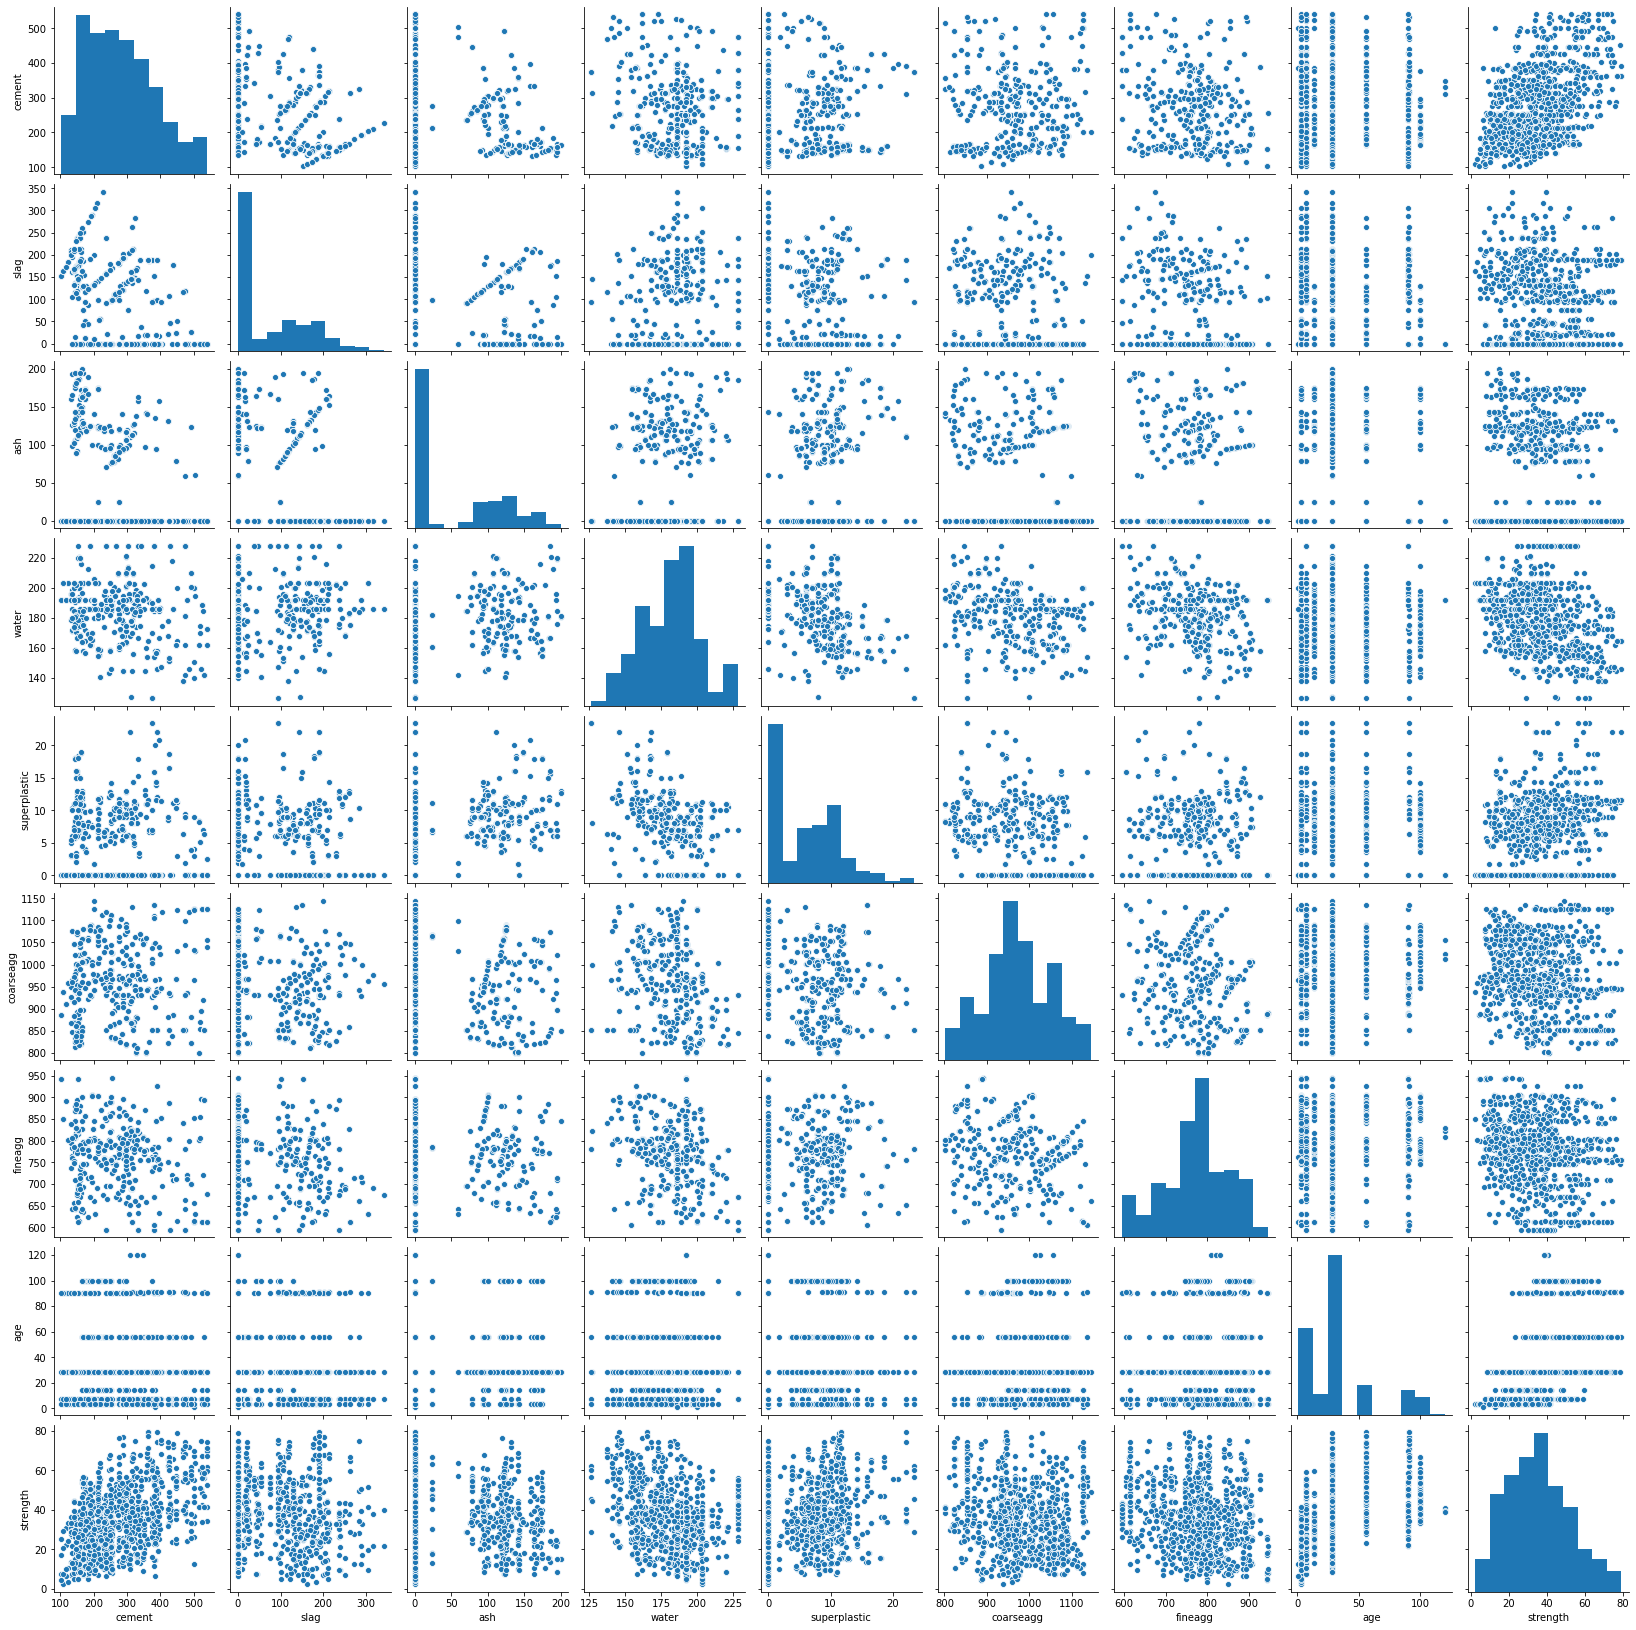

In [14]:
sns.pairplot(df)
# Interpreatation
# Below it explains the relationship between various faetures
# Age is behaving as as categorial data ( from the graph, it has distributed into groups or bins)

2. Multivariate Anaysis using regression

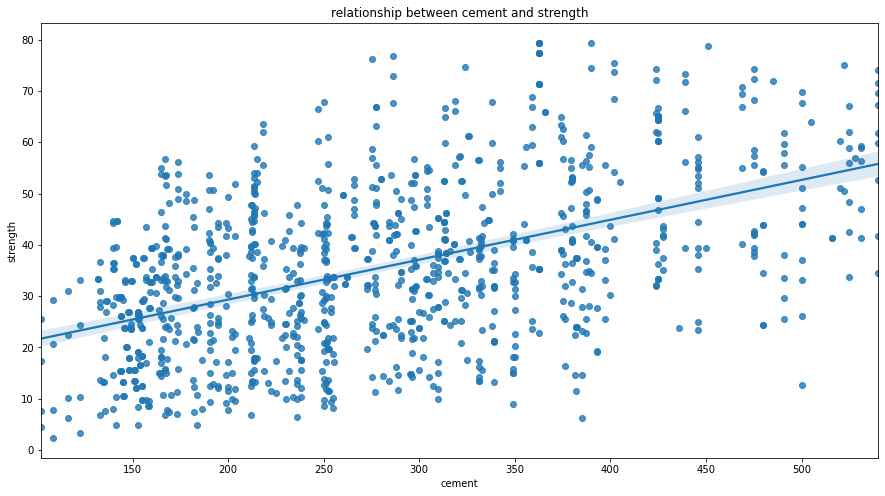

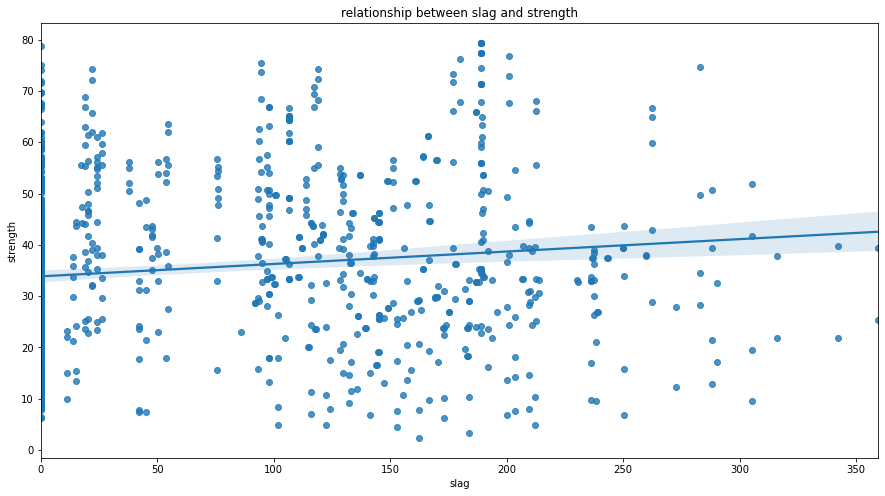

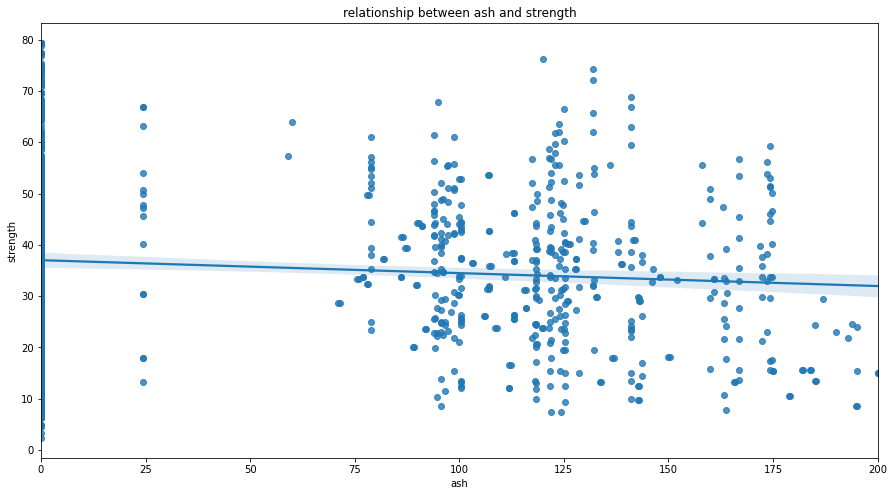

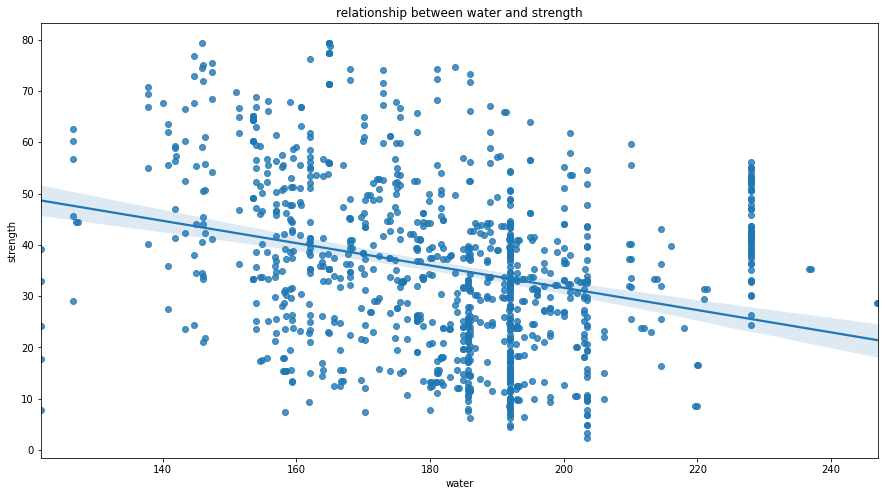

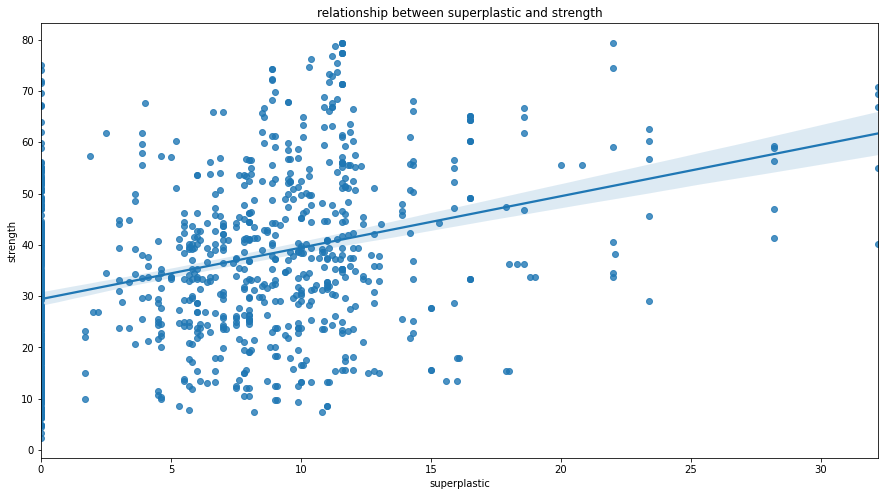

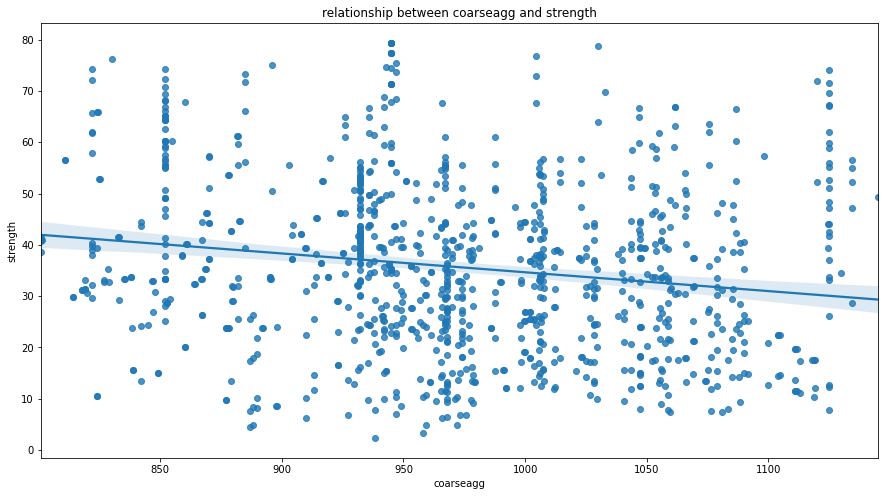

In [ ]:
for col in list(df2.columns): # content of all columns with values are converting in a list
    if col!='strength':
        fig,ax1=plt.subplots(figsize =(15,8),sharex =False)
        sns.regplot(x=df2[col], y=df['strength'], ax=ax1).set_title(f'relationship between {col} and strength')
        

3. Plotting Coorelation Plot 

In [ ]:
Corr_Matrix = df2.corr()

In [ ]:
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(Corr_Matrix, annot=True)

#Between the feature correlation should be 30%( so as to avoid multicolinearlity)
#Between the featues & target it should be between 60-65%

# Correlation DataFrame

In [ ]:
def corrwithtarget(data,tcol):
    ind_var = data.drop([tcol], axis = 1).columns
    corr_result = []
    for col in ind_var:
        corr_result.append(data[tcol].corr(data[col]))
    view_col = pd.DataFrame([ind_var,corr_result],index = ['Variable','Correlation']).T.sort_values('Correlation', ascending = False)
    return view_col

In [ ]:
corrwithtarget(df,'strength' )

#### The Second Method to find out Multi- collinearity is knowns VIF
    VIF - Variance Inflation Factor/Index - calculate the regression of each Variable
    VIF = 1/(1-R Square)
    If VIF is more than 5, Variable is high collinear

    Step1: Regress every Independent varaibale with each other and find the R Square
    Step 2:Find out using VIF using mentioned Formula Interpretation 


In [ ]:
def VIF_Collinearity(in_var):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif = pd.DataFrame()
    vif["vif_factor"] = [variance_inflation_factor(in_var.values,i) for i in range(in_var.shape[1])]
    vif["Feature"] = in_var.columns
    return vif.sort_values('vif_factor', ascending = False)

In [ ]:
VIF_Collinearity(df.drop('strength', axis = 1))

# PCA

In [ ]:
def applyPCA(x):
    col = []
    ncom = len(x.columns)
    from sklearn.preprocessing import StandardScaler
    x = StandardScaler().fit_transform(x)
    
    from sklearn.decomposition import PCA
    
    for i in range(1,ncom):
        pca = PCA(n_components = i)
        p_components = pca.fit_transform(x)
        expvarr = np.cumsum(pca.explained_variance_ratio_)
        if expvarr[i-1] > 0.9:
            n_components = i 
            break
    print("Explained Variance Ration after PCA is:",expvarr)
    
    
    # Creating DataFrame
    for j in range(1,n_components+1):
        col.append("pc"+ str(j))
    pcom = pd.DataFrame(data = p_components, columns = col )
    return pcom

In [ ]:
transform_df = applyPCA(df.drop('strength',axis = 1))

In [ ]:
transform_df

In [ ]:
transform_df = transform_df.join(df[['strength']] , how = 'left') ## joining the transform data with the strength

In [ ]:
VIF_Collinearity(transform_df)

# Model Building  - will happen in 3 stages here:


In [ ]:
def traintestsplit(data, tcol, test_size = 0.3):
    x = data.drop(tcol, axis = 1)
    y = data[tcol]
    return train_test_split(x, y, test_size = test_size, random_state = 50)

# Function for Model Building

In [ ]:
def build_model(modelname, model, data, tcol):
    x_train, x_test, y_train, y_test = traintestsplit(data, tcol)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    r2score = r2_score(y_test, y_pred)
    temp = [modelname, rmse, r2score]
    return temp

In [ ]:
lr = LinearRegression()

In [ ]:
build_model("Linear Regression", lr, transform_df,'strength')

# Building Multiple Models

In [ ]:
def multiple_models(data, tcol):
    col_names = ["Model_Name","RMSE", "R_Square"]
    result = pd.DataFrame(columns=col_names)
    result.loc[len(result)] = build_model("Linear_Regression" , lr , transform_df , 'strength') 
    result.loc[len(result)] = build_model("Lasso_Regression" , Lasso() , transform_df , 'strength')
    result.loc[len(result)] = build_model("Ridge_Regression" , Ridge() , transform_df , 'strength')
    result.loc[len(result)] = build_model("Decision_Tree_Regressor" , DecisionTreeRegressor(), transform_df , 'strength')
    result.loc[len(result)] = build_model("Gradient_Boosting_Regressor" , GradientBoostingRegressor() , transform_df , 'strength')    
    result.loc[len(result)] = build_model("AdaBoost_Regressor" , AdaBoostRegressor() , transform_df , 'strength')
    result.loc[len(result)] = build_model("Random_Forest_Regressor" , RandomForestRegressor() , transform_df , 'strength')  
    result.loc[len(result)] = build_model("XGB_Regressor" , XGBRegressor() , transform_df , 'strength') 
    result.loc[len(result)] = build_model("Support_Vector_Machine" , SVR() , transform_df , 'strength')
    result.loc[len(result)] = build_model("K_Nearest_Neighbor_Regessor" , KNeighborsRegressor() , transform_df , 'strength')
    result.loc[len(result)] = build_model("AdaBoost_Regressor" , AdaBoostRegressor() , transform_df , 'strength')
                                        
    return result

In [ ]:
multiple_models(transform_df , 'strength')

# Model Building with K-fold validation

In [ ]:
def kfold_cv(x, y, fold = 10):
    lr = LinearRegression()
    las = Lasso()
    rid = Ridge()
    rd = RandomForestRegressor()
    dt = DecisionTreeRegressor()
    adb = AdaBoostRegressor()
    gb = GradientBoostingRegressor()
    svr = SVR()
    kn = KNeighborsRegressor()
    xg = XGBRegressor()
    
    score_lr = cross_val_score(lr, x, y, cv = fold)
    score_las = cross_val_score(las, x, y, cv = fold)
    score_rid = cross_val_score(rid, x, y, cv = fold)
    score_rd = cross_val_score(rd, x, y, cv = fold)
    score_dt = cross_val_score(dt, x, y, cv = fold)
    score_adb = cross_val_score(adb, x, y, cv = fold)
    score_gb = cross_val_score(gb, x, y, cv = fold)
    score_svr = cross_val_score(svr, x, y, cv = fold)
    score_kn = cross_val_score(kn, x, y, cv = fold)
    score_xg = cross_val_score(xg, x, y, cv = fold)
    
    models = [lr,las,rid,rd,dt,adb,gb,svr,kn,xg]
    model_names = ["Linear Regression", "Lasso Regression", "Ridge Regression","Random Forest","Decison Tree","Ada Boost","Gradient Boost","Support Vector Machine","KNN", "XGBoost"]
    scores = [score_lr,score_las,score_rid,score_rd,score_dt,score_adb,score_gb,score_svr,score_kn,score_xg]
    
    result = []
    for idx in range(0,len(models)):
        print(model_names[idx])
        score_mean = np.mean(scores[idx])
        score_std =np.std(scores[idx])
        n_names = model_names[idx]
        temp = [n_names,score_mean, score_std]
        result.append(temp)
    
    result_df = pd.DataFrame(result,columns=['Model Name','Average Accuracy','Standard Deviation'])
    
    return result_df
    

In [ ]:
x = df.drop("strength", axis=1)

In [ ]:
y = df[['strength']]

In [ ]:
kfold_cv(x,y)

### While Selecting the Model
Average Accuracy should be more and Standard deviation should be low

# Hyper Parmater Tuning

In [ ]:
def tunned_model(x, y, fold = 10):
    las = Lasso()
    rid = Ridge()
    gb = GradientBoostingRegressor()
    svr = SVR()
    kn = KNeighborsRegressor()
    xg = XGBRegressor()
    
    # Parameter Grid
    params_las = {'alpha':[1e-15, 1e-12, 1e-10, 1e-8,1e-6,1e-4,1e-2,1,0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,80,100,200,300,400,500,600,1000]}
    params_gb = {'alpha':[0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,1]}
    params_svm = {'kernel':['linear','rbf','sigmoid','poly'], 'gamma':['scale','auto']}
    params_knn = {'n_neighbors':[0,1,2,3,4,5,6,7,8,9,10,12,15,18,21,24,27,29,31,33,35,37,39,41,43,45,46,48,49,50]}
    params_xg = {'alpha':[0,1],'gamma':[10,20,30,40,50,60,70,80,90,100],'eta':[0,1],'reg_lambda':[0,1]}
    
    # Hyperparamter Tuning
    tunned_lasso = GridSearchCV(las,params_las, cv = fold)
    tunned_ridge = GridSearchCV(rid,params_las,cv = fold)
    tunned_GB = GridSearchCV(gb, params_gb,cv= fold)
    tunned_SVR = GridSearchCV(svr, params_svm,cv = fold)
    tunned_KNN = GridSearchCV(kn, params_knn, cv = fold)
    tunned_XGB = GridSearchCV(xg, params_xg,cv = fold, verbose = True)
    
    # Fitting Data
    tunned_lasso.fit(x,y)
    tunned_ridge.fit(x,y)
    tunned_GB.fit(x,y)
    tunned_SVR.fit(x,y)
    tunned_KNN.fit(x,y)
    tunned_XGB.fit(x,y)
    
    tunned =[tunned_lasso,tunned_ridge,tunned_GB,tunned_SVR,tunned_KNN,tunned_XGB]
    model_name = ['Lasso','Ridge','GB','SVR','KNN','XGB']
    
    for i in range(0,len(tunned)):
        print('Model: ', model_name[i])
        print('Best Parameters: ', tunned[i].best_params_)
        
    

In [ ]:
tunned_model(x,y)

In [ ]:
def kfold_cv(x, y, fold = 10):
    lr = LinearRegression()
    las = Lasso(alpha = 1e-15)
    rid = Ridge(alpha = 400)
    rd = RandomForestRegressor()
    dt = DecisionTreeRegressor()
    adb = AdaBoostRegressor()
    gb = GradientBoostingRegressor('alpha': 0.3)
    svr = SVR()
    kn = KNeighborsRegressor(n_neigbhour = 3)
    xg = XGBRegressor(alpha= 1, eta= 1, gamma: 20, reg_lambda= 1)
      
    score_lr = cross_val_score(lr, x, y, cv = fold)
    score_las = cross_val_score(las, x, y, cv = fold)
    score_rid = cross_val_score(rid, x, y, cv = fold)
    score_rd = cross_val_score(rd, x, y, cv = fold)
    score_dt = cross_val_score(dt, x, y, cv = fold)
    score_adb = cross_val_score(adb, x, y, cv = fold)
    score_gb = cross_val_score(gb, x, y, cv = fold)
    score_svr = cross_val_score(svr, x, y, cv = fold)
    score_kn = cross_val_score(kn, x, y, cv = fold)
    score_xg = cross_val_score(xg, x, y, cv = fold)
    
    models = [lr,las,rid,rd,dt,adb,gb,svr,kn,xg]
    model_names = ["Linear Regression", "Lasso Regression", "Ridge Regression","Random Forest","Decison Tree","Ada Boost","Gradient Boost","Support Vector Machine","KNN", "XGBoost"]
    scores = [score_lr,score_las,score_rid,score_rd,score_dt,score_adb,score_gb,score_svr,score_kn,score_xg]
    
    result = []
    for idx in range(0,len(models)):
        print(model_names[idx])
        score_mean = np.mean(scores[idx])
        score_std =np.std(scores[idx])
        n_names = model_names[idx]
        temp = [n_names,score_mean, score_std]
        result.append(temp)
    
    result_df = pd.DataFrame(result,columns=['Model Name','Average Accuracy','Standard Deviation'])
    
    return result_df

In [ ]:
kfold_cv(x, y)